In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [5]:
fake = pd.read_csv('C:\Users\ASIF\Desktop\github_pro\Fake.csv')
true = pd.read_csv('C:\Users\ASIF\Desktop\github_pro\True.csv')

In [6]:
fake.shape

(23481, 4)

In [7]:
true.shape

(21417, 4)

In [8]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [9]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [10]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [11]:
#check datas
data.head()

,title,text,subject,date,target
0,BEST 10 SECONDS OF YOUR DAY: Watch Al Sharpton...,"Na, na, na, na na, na, na, na, hey, hey, hey g...",politics,"Feb 28, 2016",fake
1,U.S. protesters march against Trump presidency...,NEW YORK (Reuters) - Demonstrators in major U....,politicsNews,"November 12, 2016",true
2,Trump HUMILIATED As China Roasts Him For Bein...,While Donald Trump is desperately trying to ge...,News,"April 14, 2017",fake
3,"In No Particular Order, Sarah Palin Uses Rand...",As much as you may want Sarah Palin to drift o...,News,"June 27, 2016",fake
4,Immigration judges exempt from Trump's federal...,(Reuters) - President Donald Trump’s federal h...,politicsNews,"March 3, 2017",true


In [12]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,BEST 10 SECONDS OF YOUR DAY: Watch Al Sharpton...,"Na, na, na, na na, na, na, na, hey, hey, hey g...",politics,fake
1,U.S. protesters march against Trump presidency...,NEW YORK (Reuters) - Demonstrators in major U....,politicsNews,true
2,Trump HUMILIATED As China Roasts Him For Bein...,While Donald Trump is desperately trying to ge...,News,fake
3,"In No Particular Order, Sarah Palin Uses Rand...",As much as you may want Sarah Palin to drift o...,News,fake
4,Immigration judges exempt from Trump's federal...,(Reuters) - President Donald Trump’s federal h...,politicsNews,true


In [13]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,"Na, na, na, na na, na, na, na, hey, hey, hey g...",politics,fake
1,NEW YORK (Reuters) - Demonstrators in major U....,politicsNews,true
2,While Donald Trump is desperately trying to ge...,News,fake
3,As much as you may want Sarah Palin to drift o...,News,fake
4,(Reuters) - President Donald Trump’s federal h...,politicsNews,true


In [14]:
# Convert to lowercase
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,"na, na, na, na na, na, na, na, hey, hey, hey g...",politics,fake
1,new york (reuters) - demonstrators in major u....,politicsNews,true
2,while donald trump is desperately trying to ge...,News,fake
3,as much as you may want sarah palin to drift o...,News,fake
4,(reuters) - president donald trump’s federal h...,politicsNews,true


In [15]:
#Remove punctution
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
data['text'] = data['text'].apply(punctuation_removal)

In [16]:
data.head()

,text,subject,target
0,na na na na na na na na hey hey hey goood byeo...,politics,fake
1,new york reuters demonstrators in major us ci...,politicsNews,true
2,while donald trump is desperately trying to ge...,News,fake
3,as much as you may want sarah palin to drift o...,News,fake
4,reuters president donald trump’s federal hiri...,politicsNews,true


In [22]:
#remove stopwords
import nltk
import sys
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASIF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\ASIF\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  


In [23]:
data.head()

,text,subject,target
0,na na na na na na na na hey hey hey goood byeo...,politics,fake
1,new york reuters demonstrators major us cities...,politicsNews,true
2,donald trump desperately trying get respect re...,News,fake
3,much may want sarah palin drift obscurity know...,News,fake
4,reuters president donald trump’s federal hirin...,politicsNews,true


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


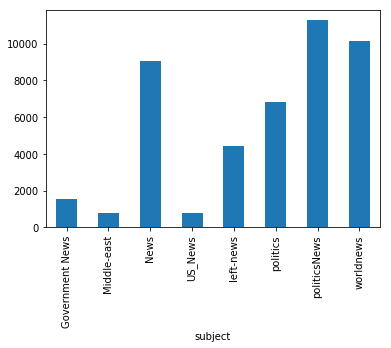

In [19]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


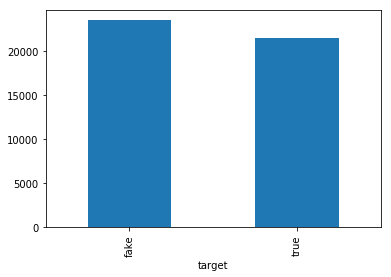

In [20]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [36]:
# Word cloud for fake news
import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ImportError: No module named WordCloud

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

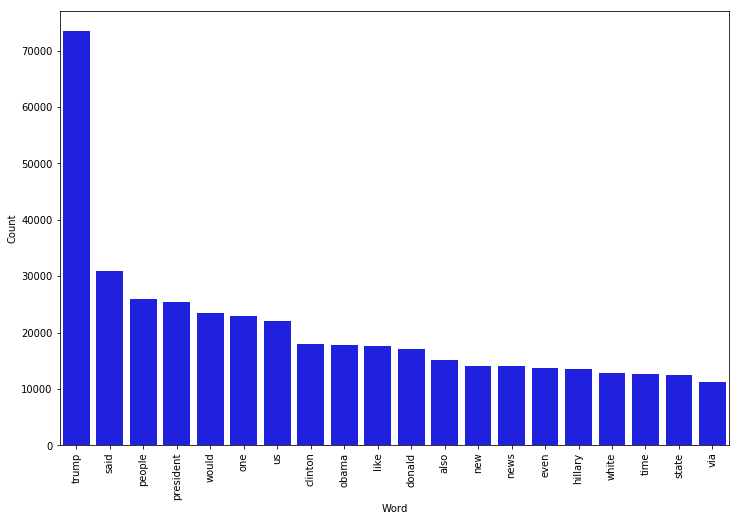

In [29]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

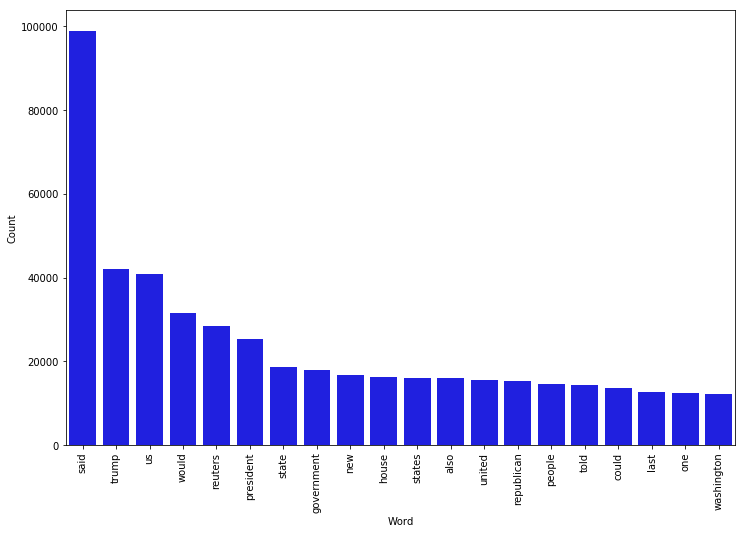

In [30]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

In [25]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [27]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

C:\Users\ASIF\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy: 98.73%


Confusion matrix, without normalization


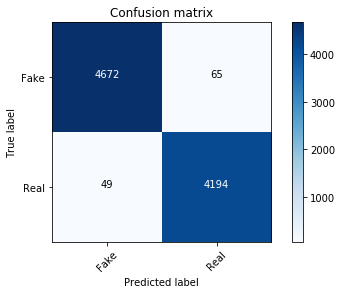

In [31]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.65%


Confusion matrix, without normalization


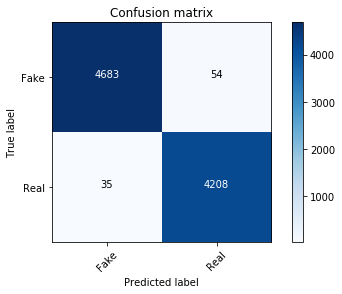

In [34]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [33]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.01%


Confusion matrix, without normalization


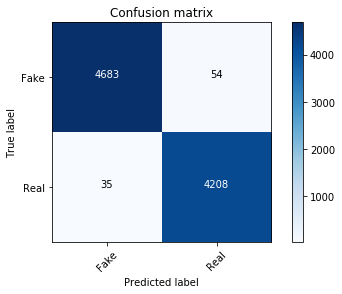

In [35]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])